###Univariate Time Series Forecasting using LSTM

The next value is predicted depending upon the last 3 values

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 28718.0156
Epoch 2/300
1/1 [==============================] - 0s 23ms/step - loss: 28404.6777
Epoch 3/300
1/1 [==============================] - 0s 24ms/step - loss: 28089.4004
Epoch 4/300
1/1 [==============================] - 0s 24ms/step - loss: 27772.3613
Epoch 5/300
1/1 [==============================] - 0s 24ms/step - loss: 27454.2559
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 27134.1875
Epoch 7/300
1/1 [==============================] - 0s 24ms/step - loss: 26809.1406
Epoch 8/300
1/1 [==============================] - 0s 28ms/step - loss: 26470.5859
Epoch 9/300
1/1 [==============================] - 0s 43ms/step - loss: 26122.8340
Epoch 10/300
1/1 [==============================] - 0s 31ms/step - loss: 25768.7910
Epoch 11/300
1/1 [==============================] - 0s 37ms/step - loss: 25410.3438
Epoch 12/300
1/1 [==============================] - 0s 36ms/step - loss: 25053.0215
Epo

### Predicting For the next 10 data

In [10]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.16872]
1 day input [196.         210.         225.16871643]
1 day output [[236.3317]]
2 day input [210.         225.16871643 236.33169556]
2 day output [[250.52321]]
3 day input [225.16872 236.3317  250.52321]
3 day output [[265.3227]]
4 day input [236.3317  250.52321 265.3227 ]
4 day output [[278.426]]
5 day input [250.52321 265.3227  278.426  ]
5 day output [[293.39435]]
6 day input [265.3227  278.426   293.39435]
6 day output [[308.76105]]
7 day input [278.426   293.39435 308.76105]
7 day output [[323.74698]]
8 day input [293.39435 308.76105 323.74698]
8 day output [[339.97122]]
9 day input [308.76105 323.74698 339.97122]
9 day output [[356.63657]]
[225.16872, 236.3317, 250.52321, 265.3227, 278.426, 293.39435, 308.76105, 323.74698, 339.97122, 356.63657]


In [11]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [12]:
len(timeseries_data)

9

In [13]:
lst_output

[225.16872,
 236.3317,
 250.52321,
 265.3227,
 278.426,
 293.39435,
 308.76105,
 323.74698,
 339.97122,
 356.63657]

### Visualizaing The Output

In [15]:
import matplotlib.pyplot as plt

In [16]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

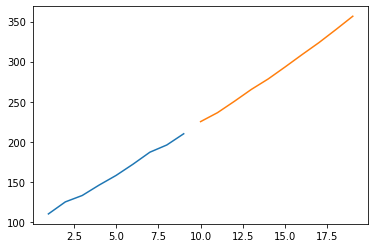

In [17]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
